# Feature Engineering: Transformations

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

label                                          body_text  body_len  punct%
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
1   ham  Nah I don't think he goes to usf, he lives aro...        49     4.1
2   ham  Even my brother is not like to speak with me. ...        62     3.2
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28     7.1
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135     4.4

### Plot the two new features

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

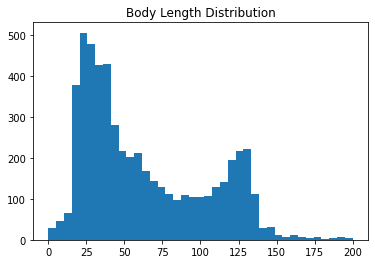

In [4]:
# checking the distribution of body length

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins=bins)
pyplot.title('Body Length Distribution')
pyplot.show()

Insigths from the plot: the ones on the right are spam (longer messages) while the one on the left are ham or real text (shorter messages).

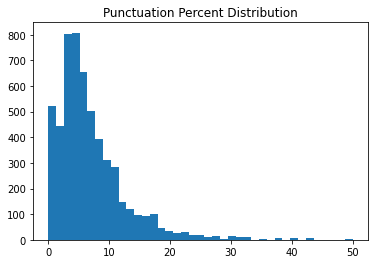

In [5]:
# checking the distribution of punctuation percent

bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins=bins)
pyplot.title('Punctuation Percent Distribution')
pyplot.show()

Insights from the plot: This feature is a good candidate for distribution since it's skewed to the left and there are a lot of outliers (which can make the model biased as the model might dig too much on the right tail).

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

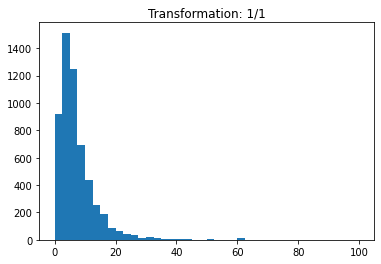

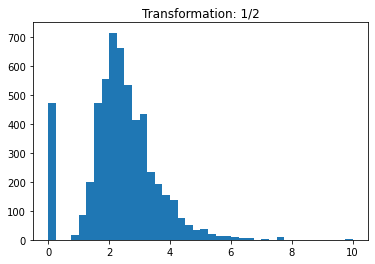

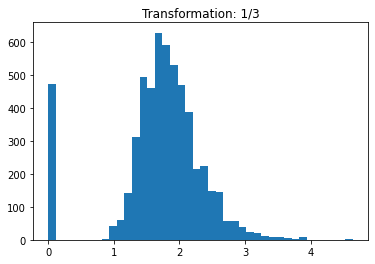

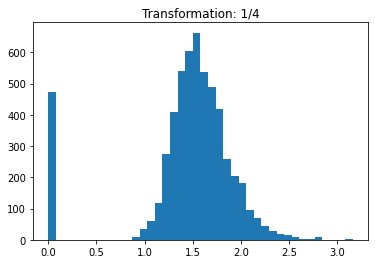

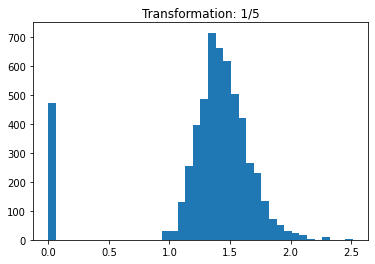

In [6]:
# Idea: do a bunch of power transformations and pick the histogram that loks the most like a normal distribution
# Transformation 1: No transformation (y^(1/1) or just y)
# Transformation 2: Square root transformation (y^(1/2))
# Transformation 3: y^(1/3)
# Transformation 4: y^(1/4)
# Transformation 5: y^(1/5)

for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40) # setting the bins to 40 but not specifying the cut points since the scale would change depending on the transformation
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

Insights from the plots: Transformation 4 or 5 looks good since they're closer to a normal distribution. Also, it is noticeable that as the transformation goes on, the outliers are being pulled to the center of the distribution. One thing to note: the stack on the left of the plots are just zeroes meaning there's no punctuation (any power transformation of zero is still zero).